# Mildly Context-Sensitive Grammar

expressive power: > context-free grammars

- cross-serial dependencies and long-distance dependencies

- context-sensitive languages $a^n b^n c^n d^n$ with the same number of a's, b's, and c's

Example cross-serial dependency 

- I like New York

- I like and hate New York

- I like and would rather be in New York

- I gave a book to Chen and a laptop to Jorge

- I gave a book and a laptop to Chen and Jorge, respectively

- I want Chen to stay and Jorge to leave

- I like and Chen hates, New York


# Unification Grammar

## definition

unification grammar: A type of feature-based grammar that uses **features** to represent properties (e.g., tense, number, gender) and constraints on how elements can combine based on these properties.

## type

**Parameterized grammar**: uses parameterized rules with attributes and values to enforce constraints on sentence structure.  Parameterized rules, e.g.,
- S → NP[person,number,"nominative"] VP[person,number]

- VP[person,number] → V[person,number] NP[person,number,"accusative"]

- NP["first",number,"nominative"] → DET[number] N[number]

**Head-Driven Phrase Structure Grammar (HPSG)**: combines principles from phrase structure/dependency/unification grammar. each constituent has a "head" that determines its syntactic and semantic properties, and constituents combine based on feature unification.

**Lexical-Functional Grammar (LFG)**: using two levels of syntactic information: constituent structure (c-structure) and functional structure (f-structure). feature unification occurs at the f-structure level, capturing grammatical functions and their relationships.

**Tree Adjoining Grammar (TAG)**: using a set of elementary trees and tree-combining operations. Feature structures can be associated with tree nodes to enforce constraints on tree combination.

**Combinatory Categorial Grammar (CCG)**: assigns each word a syntactic category representing its combinatorial properties. Feature structures can be added to these categories.

**Construction Grammar (CxG)**: emphasize the role of constructions (pairings of form and meaning) in language structure. Feature structures can be associated with constructions.

## advantage

- representation of linguistic properties and constraints.

- generate and parse sentences that are both correct in grammar (agreement, subcategorization) and semantics (type coersion, selectional restriction).

- agreement with features

```markdown
      1. S → NP VP 
            [NP person = VP person]

      2. S → Aux NP VP 
            [Aux person = NP person]

      3. Verb → bites 
            [Verb person = 3]

      4. Verb → bite 
            [Verb person = 1]
```

- Subcategorization with Features

    ```markdown
        1. VP → Verb 
            [VP SUBCAT = intrans]

        2. VP → Verb NP 
            [VP SUBCAT = trans]
            
        3. VP → Verb NP NP 
            [VP SUBCAT = ditrans]
    ```

## feature structure representation

Feature Structure (FS) or Feature Description (FD):

- Attribute-Value Matrix (AVM):  a nested list of attribute-value pairs. A matrix where rows represent attributes and columns represent their corresponding values.

- DAG (Directed Acyclic Graph): A graph that has directed edges and no cycles. Feature paths (from root to a node)

<!DOCTYPE html>
<html>
  <head>
    <title>Display Two Images on the Same Row in HTML</title>
    <style>
      .image-container {
        display: flex;
        flex-direction: row;
        justify-content: center;
      }
      .image-container > div {
        margin: 0 10px;
        text-align: center;
      }
      .image-container img {
        max-width: 100%;
        height: auto;
      }
      .image-container .image-title {
        margin-top: 10px;
        text-align: center;
      }
    </style>
  </head>
  <body>
    <div class="image-container">
      <div>
        <div class="image-title">Attribute-value Matrix</div>
        <br>
        <img src='https://images.ctfassets.net/nrgyaltdicpt/1VfH909E9WtKm3mKCdRXFm/c80f0f7ae14b397d60143ed4828136de/AVMexample2.svg' alt="Attribute-value Matrix">
      </div>
      <div>
        <div class="image-title">Directed acyclic graph</div>
        <br>
        <img src="https://www.researchgate.net/profile/Pontus-Waernestal/publication/2541804/figure/fig1/AS:341133096964096@1458343876086/The-feature-structure-represented-as-a-Directed-Acyclic-Graph-DAG.png" alt="DAG">
      </div>
    </div>
  </body>
</html>


## feature unification

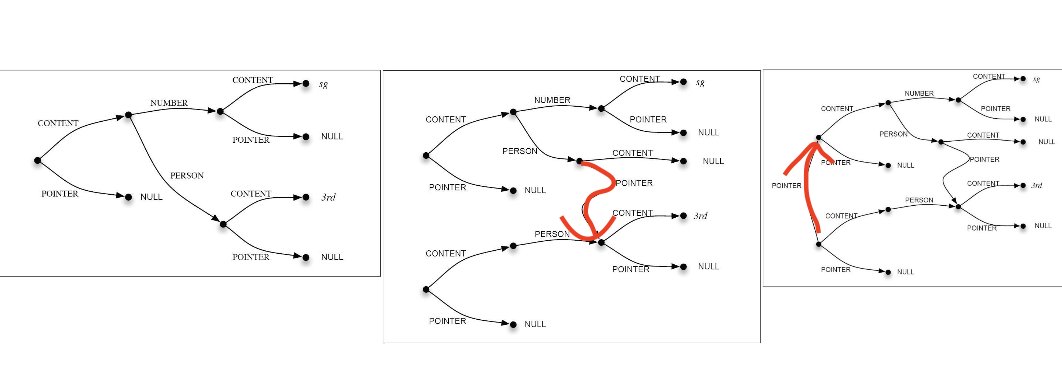

### recursive definition

feature unification: recursively combine two feature structures if they can be merged into a consistent feature structure.

- unify Leaf nodes if:
    - They are the same
    - One can "subsume" the other
    - Special case: One or both are blank

**Subsumption** 包容: The process of unifying a more general concept with a more specific concept in feature structures, where the more general concept is subsumed by the more specific concept.

- "undefined" is the most general concept
- "fail" is the least general concept

### algorithm

```python
if possible: 

    unifying two feature structures by merging them into a consistent feature structure

else: 

    return failure
```


```html
function UNIFY(f1-orig, f2-orig) returns f-structure or failure
f1 = Dereferenced contents of f1-orig
f2 = Dereferenced contents of f2-orig
if f1 and f2 are identical then
  f1.pointer = f2
  return f2
else if f1 is null then
  f1.pointer = f2
  return f2
else if f2 is null then
  f2.pointer = f1
  return f1
else if both f1 and f2 are complex feature structures then
  f2.pointer = f1
  for each f2-feature in f2 do
    f1-feature = Find or create a corresponding feature in f1
    if UNIFY(f1-feature.value, f2-feature.value) returns failure then
      return failure
  return f1
else return failure
```

### example

sentences "eat pizza with pepperoni" and "eat pizza with fork," 

let's consider a simplified example of feature structures for the words:

```html
eat: {SUBJ: NP, OBJ: NP, MOD: PP}
pizza: {CAT: NP}
with: {CAT: PP, OBJ: NP}
pepperoni: {CAT: NP}
fork: {CAT: NP}
```

SUBJ: subject. OBJ: object. MOD: modifier

CAT: syntactic category of a word, such as noun phrase (NP), verb phrase (VP), or prepositional phrase (PP).

<table style="border-collapse: collapse; width: 100%;">
  <tr>
    <th style="border: 1px solid black; padding: 8px;">Sentence "eat pizza with pepperoni"</th>
    <th style="border: 1px solid black; padding: 8px;">Sentence "eat pizza with fork"</th>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px; vertical-align: top;">
      <ol>
        <li><strong>Unify 'pizza' and 'pepperoni':</strong><br>
        {CAT: NP, MOD: PP} + {CAT: NP} = {CAT: pizza, MOD: with_pepperoni}</li>
        <li><strong>Unify 'with' and the updated 'pepperoni':</strong><br>
        {CAT: PP, OBJ: NP} + {CAT: pizza, MOD: with_pepperoni} = {CAT: with_pepperoni, OBJ: pizza}</li>
        <li><strong>Unify 'eat' and the updated 'pizza':</strong><br>
        {SUBJ: NP, OBJ: NP, MOD: PP} + {CAT: pizza, MOD: with_pepperoni} = {SUBJ: NP, OBJ: pizza_with_pepperoni, MOD: PP}</li>
      </ol>
    </td>
    <td style="border: 1px solid black; padding: 8px; vertical-align: top;">
      <ol>
        <li><strong>Unify 'eat' and 'pizza':</strong><br>
        {SUBJ: NP, OBJ: NP, MOD: PP} + {CAT: NP, MOD: PP} = {SUBJ: NP, OBJ: pizza, MOD: PP}</li>
        <li><strong>Unify 'with' and 'fork':</strong><br>
        {CAT: PP, OBJ: NP} + {CAT: NP} = {CAT: with_fork, OBJ: NP}</li>
        <li><strong>Unify the updated 'eat' and the updated 'with':</strong><br>
        {SUBJ: NP, OBJ: pizza, MOD: PP} + {CAT: with_fork, OBJ: NP} = {SUBJ: NP, OBJ: pizza, MOD: with_fork}</li>
      </ol>
    </td>
  </tr>
</table>


### NLTK example

In [5]:
fs = FeatStruct(type='NP', number='singular', person=3)

In [10]:
from nltk.featstruct import FeatStruct
from nltk.sem.logic import Variable

fs1 = FeatStruct(type='NP', person=3) 
fs2 = FeatStruct(type='NP', person=1) 
fs3 = FeatStruct(type='NP', number='singular')

# feature unification: success and failure
print(fs1.unify(fs3), fs2.unify(fs1))

fs4 = FeatStruct(agr=FeatStruct(number=Variable('?n')), subj=FeatStruct(number=Variable('?n')))
print(fs4)


[ number = 'singular' ]
[ person = 3          ]
[ type   = 'NP'       ] None
[ agr  = [ number = ?n ] ]
[                        ]
[ subj = [ number = ?n ] ]


# Tree Adjoining Grammar (TAG)

## structure

two types of basic elements:

- elementary trees (initial and auxiliary trees): 

  small syntactic structures that can be combined using the operations to form larger trees and ultimately parse sentences.

  has features that can be associated with the top half and with the bottom half. 
  
  unification is used to merge the features of a lexical item with an elementary tree.

- operations (substitution and adjunction). 

  - Substitution: Insert an initial tree to the bottom of a tree

  - Adjunction (not in TSG): Insert an auxiliary tree fragment in the middle of a tree
    
    - Used for long-distance dependencies and for optional modifiers


Lexicalized TAG: each initial or auxiliary tree is labeled with a lexical item

## example

<table>
  <tr>
    <th>Sentence "eat pizza with pepperoni"</th>
    <th>Sentence "eat pizza with fork"</th>
  </tr>
  <tr>
    <td>
      <pre>
  eat → eat(VP↓)
  pizza → pizza(NP↓)
  with → with(PP↓)
  pepperoni → pepperoni(NP↓)
  <br>
  Initial Trees:
  [eat(VP↓)]
  [pizza(NP↓)]
  [with(PP↓)]
  [pepperoni(NP↓)]
  <br>
  Operations:
  Substitute(pizza, eat)
  Substitute(pepperoni, with)
  <span style="color:red">Adjunction(with, pizza)</span>
      </pre>
    </td>
    <td>
      <pre>
  eat → eat(VP↓)
  pizza → pizza(NP↓)
  with → with(PP↓)
  fork → fork(NP↓)
  <br>
  Initial Trees:
  [eat(VP↓)]
  [pizza(NP↓)]
  [with(PP↓)]
  [fork(NP↓)]
  <br>
  Operations:
  Substitute(pizza, eat)
  Substitute(fork, with)
  <span style="color:red">Adjunction(with, eat)</span>
      </pre>
    </td>
  </tr>
</table>


## Tree Substitution Grammar (TSG) = context-free grammar 

- TSG has the **same expressivity as CFG** because only use tree substitution operations without adjunctions.

- terminal symbols are associated with entire tree fragments (elementary trees) rather than individual nodes, which allows for the substitution of one tree fragment into another to form more complex structures. 

| Property            | Tree Substitution Grammar (TSG) | Tree Adjoining Grammar (TAG) |
|---------------------|---------------------------------|------------------------------|
| Formalism           | Context-Free Grammar            | Mildly Context-Sensitive     |
| Tree Operations     | Substitution                    | Substitution, Adjunction     |
| Expressivity        | Limited (e.g., can't handle cross-serial dependencies) | Higher (e.g., can handle cross-serial dependencies) |
| Growth Property     | Linear                          | Linear (Constant Growth)     |
| Parsing Complexity  | Polynomial (e.g., CYK algorithm) | Higher, but still efficient  |


# Combinatory Categorical grammar (CCG)

## Structure

There are three main components in CCG: Categories, Combinatory rules, and Lexicon.

### Lexicon

A set of categories and their associated lexical items.

### Categories

Categories are divided into basic categories and complex categories.

#### Basic Categories

- Nouns (N)
- Adjectives (N/N)
- Articles (NP/N)
- Prepositions ((NP\NP)/NP)
- Transitive verbs ((S\NP)/NP)
- Intransitive verbs (S\NP)

#### Complex Categories

Where X and Y are categories:

- X/Y: an argument of type Y should appear on the right.
- X\Y: an argument of type Y should appear on the left.

### Combinatory Rules

Operations that combine categories to form new categories.

#### Function Composition

Allows for the composition of functions in various directions.

- X/Y Y/Z -> X/Z
- X\Y Z\X -> Z\Y
- X/Y Y\Z -> X\Z
- X/Y Z\X -> Z/Y

#### Type Raising

Converts a basic category into a more complex category.

- X -> Y/(Y\X)
- X -> Y\(Y/X)

#### Coordination

Combines categories with the same type.


## corpus: CCGBank


CCGBank is a treebank that provides CCG parsed sentences and their CCG derivations

## NLTK example

In [7]:
from nltk.ccg import chart, lexicon 

# parser = chart.CCGChartParser(lex, chart.DefaultRuleSet)
lex = lexicon.fromstring('''
:- S, NP, N, VP
Det :: NP/N
Pro :: NP
Modal :: S\\NP/VP 
TV :: VP/NP
DTV :: TV/NP
the => Det
that => Det
that => NP
I => Pro
you => Pro
we => Pro
chef => N
cake => N 
children => N 
dough => N
will => Modal
should => Modal
might => Modal
must => Modal
and => var\\.,var/.,var
to => VP[to]/VP
without => (VP\\VP)/VP[ing] 
be => TV
cook => TV
eat => TV
cooking => VP[ing]/NP 
give => DTV
is => (S\\NP)/NP
prefer => (S\\NP)/NP 
which => (N\\N)/(S/NP) 
persuade => (VP/VP[to])/NP 
''')

# Chart parser for CCGs
parser = chart.CCGChartParser(lex, chart.DefaultRuleSet)

In [12]:
# generates parse trees for the sentenc
for parse in parser.parse("you prefer that cake".split()):
    chart.printCCGDerivation(parse) 
    break

 you    prefer      that   cake
 NP   ((S\NP)/NP)  (NP/N)   N
                  -------------->
                        NP
     --------------------------->
               (S\NP)
--------------------------------<
               S


In [5]:
for parse in parser.parse("that is the cake which you prefer".split()):
    chart.printCCGDerivation(parse) 
    break

 that      is        the    cake      which       you    prefer
  NP   ((S\NP)/NP)  (NP/N)   N    ((N\N)/(S/NP))  NP   ((S\NP)/NP)
                                                 ----->T
                                              (S/(S\NP))
                                                 ------------------>B
                                                       (S/NP)
                                 ---------------------------------->
                                               (N\N)
                           ----------------------------------------<
                                              N
                   ------------------------------------------------>
                                          NP
      ------------------------------------------------------------->
                                 (S\NP)
-------------------------------------------------------------------<
                                 S
